# Netflix Stock Price Trend Analysis Project
### Author github.com/tushar2704

### Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('./archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [20]:
# Read the CSV file containing the 5-year historical Netflix stock data
df = pd.read_csv(r"D:\Stock-Market-Trend-Analysis\src\data\netflix_stock_5y.csv")


In [21]:
df.head(11)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-08-13 00:00:00-04:00,339.890015,347.190002,339.070007,341.309998,6888900,0.0,0.0
1,2018-08-14 00:00:00-04:00,342.089996,342.410004,336.250000,337.489990,5805200,0.0,0.0
2,2018-08-15 00:00:00-04:00,334.029999,335.500000,321.000000,326.399994,11784500,0.0,0.0
3,2018-08-16 00:00:00-04:00,329.899994,331.170013,321.209991,322.440002,6689700,0.0,0.0
4,2018-08-17 00:00:00-04:00,319.010010,324.369995,312.959991,316.779999,10407900,0.0,0.0
5,2018-08-20 00:00:00-04:00,314.640015,331.600006,310.929993,327.730011,13591100,0.0,0.0
6,2018-08-21 00:00:00-04:00,331.000000,341.500000,329.700012,338.019989,14783200,0.0,0.0
7,2018-08-22 00:00:00-04:00,338.489990,346.209991,337.410004,344.440002,8930700,0.0,0.0
8,2018-08-23 00:00:00-04:00,348.109985,350.079987,337.649994,339.170013,11336400,0.0,0.0
9,2018-08-24 00:00:00-04:00,346.000000,359.149994,344.540009,358.820007,14729100,0.0,0.0


In [22]:
# Create a copy of the DataFrame for visualization purposes
viz = df.copy()

In [44]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', '50_day_MA', 'RSI'],
      dtype='object')

# Data Preparation

In [24]:
# Check for missing values in each column of the DataFrame 'df'
missing_values = df.isnull().sum()
print("Missing values in each column:\n{}".format(missing_values))


Missing values in each column:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [8]:
# Display information about the DataFrame 'df'
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1258 non-null   object 
 1   Open          1258 non-null   float64
 2   High          1258 non-null   float64
 3   Low           1258 non-null   float64
 4   Close         1258 non-null   float64
 5   Volume        1258 non-null   int64  
 6   Dividends     1258 non-null   float64
 7   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 78.8+ KB
None


In [8]:
# Display summary statistics for each column using the describe() function
summary_stats = df.describe().T

# Print the summary statistics
print(summary_stats)


               count          mean           std           min           25%  \
Open          1258.0  3.934718e+02  1.171758e+02  1.639600e+02  3.098125e+02   
High          1258.0  3.997219e+02  1.178263e+02  1.720600e+02  3.156100e+02   
Low           1258.0  3.870284e+02  1.161198e+02  1.627100e+02  3.042975e+02   
Close         1258.0  3.935017e+02  1.168975e+02  1.663700e+02  3.105150e+02   
Volume        1258.0  7.755346e+06  6.581512e+06  1.144000e+06  4.326000e+06   
Dividends     1258.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Stock Splits  1258.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                       50%           75%           max  
Open          3.655750e+02  4.950000e+02  6.923500e+02  
High          3.712000e+02  5.029925e+02  7.009900e+02  
Low           3.602200e+02  4.877750e+02  6.860900e+02  
Close         3.659450e+02  4.945575e+02  6.916900e+02  
Volume        6.078350e+06  9.104225e+06  1.333875e+08  
Dividends     0.0

In [25]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


<Axes: >

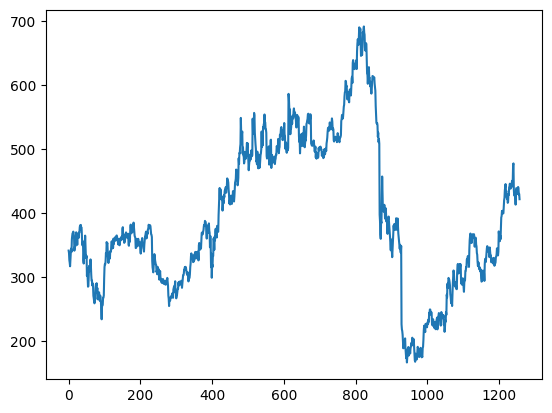

In [26]:
# Explore data distribution and trends
df['Close'].plot()

## Feature Engineering

### Create additional features like moving averages, technical indicators, etc.

In [27]:
# Calculate 50-day moving average
df['50_day_MA'] = df['Close'].rolling(window=50).mean()


In [28]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Calculate RSI for the entire DataFrame
df['RSI'] = calculate_rsi(df)


## Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', '50_day_MA']
target = 'Close'

# Split data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

## Model Selection and Training

In [17]:
!pip install Cython
!pip install pystan==2.19.1.1
!pip install fbprophet


  Using cached Cython-3.0.0-cp311-cp311-win_amd64.whl (2.8 MB)
^C
^C


In [33]:
from statsmodels.tsa.arima.model import ARIMA


In [37]:
#from fbprophet import Prophet

#from fbprophet import Prophet

#train ARIMA model
arima_model =ARIMA(train_data[target], order=(5, 1, 1))


# Fit the ARIMA model
arima_fit = arima_model.fit()

## Model Evaluation

In [40]:
from sklearn.metrics import mean_squared_error

predictions = arima_fit.forecast(steps=len(test_data))
mse = mean_squared_error(test_data[target], predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 11420.608298491321


## Visualization and Prediction

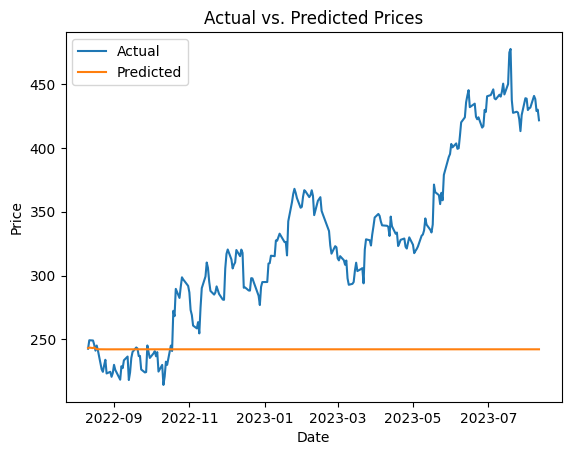

In [43]:
import matplotlib.pyplot as plt

# Visualize predictions and actual prices
plt.plot(test_data['Date'], test_data[target], label='Actual')   # Plot actual prices
plt.plot(test_data['Date'], predictions, label='Predicted')      # Plot predicted prices
plt.legend()                                                     # Show legend
plt.xlabel('Date')                                               # Set x-axis label
plt.ylabel('Price')                                              # Set y-axis label
plt.title('Actual vs. Predicted Prices')                         # Set plot title
plt.show()                                                       # Display the plot

# Use the trained model to predict future prices
# Generate a range of dates for future predictions
future_dates = pd.date_range(start=test_data['Date'].iloc[-1], periods=30, freq='D')
# Create a DataFrame to store future prediction dates
future = pd.DataFrame({'ds': future_dates})


## Model Selection and Training - XGBoost

In [48]:
import xgboost as xgb

# Define features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', '50_day_MA']
target = 'Close'

# Create DMatrix for XGBoost
train_dmatrix = xgb.DMatrix(data=train_data[features], label=train_data[target])

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1
}

# Train the XGBoost model
xgb_model = xgb.train(params=params, dtrain=train_dmatrix)


## Model Evaluation - XGBoost

In [49]:
# Create DMatrix for test data
test_dmatrix = xgb.DMatrix(data=test_data[features], label=test_data[target])

# Use the trained XGBoost model to make predictions
xgb_predictions = xgb_model.predict(test_dmatrix)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(test_data[target], xgb_predictions)
print(f"XGBoost Mean Squared Error: {mse_xgb}")

XGBoost Mean Squared Error: 13313.510338331584


## Visualization and Prediction - XGBoost

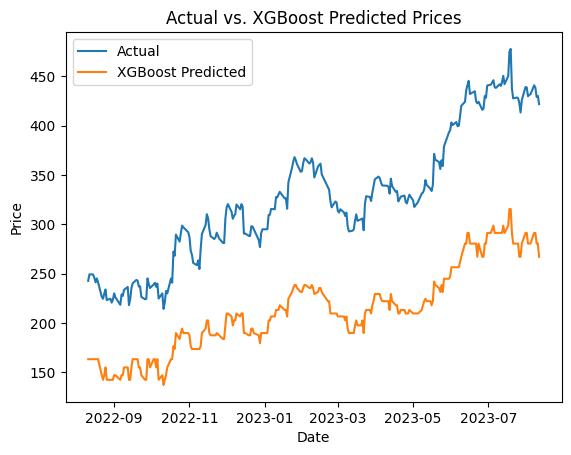

In [51]:
# Visualize XGBoost predictions and actual prices
plt.plot(test_data['Date'], test_data[target], label='Actual')
plt.plot(test_data['Date'], xgb_predictions, label='XGBoost Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. XGBoost Predicted Prices')
plt.show()

# Use the trained XGBoost model to predict future prices
#future_dmatrix = xgb.DMatrix(data=future[features])
#future_predictions = xgb_model.predict(future_dmatrix)